In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [67]:
array_size = np.array([100, 100])
blocksize = np.array([10, 10])
overlap_frac = .5

In [68]:
overlap = np.ceil(blocksize * overlap_frac).astype(int)

# store block coordinates in a dask array
nblocks = np.ceil(array_size / blocksize).astype(np.int16)
block_coords = []
for (i, j) in np.ndindex(*nblocks):
    
    # Get coords of full block
    full_start = blocksize * (i, j) - overlap
    full_stop = full_start + blocksize + 2 * overlap
    full_start = np.maximum(0, full_start)
    full_stop = np.minimum(array_size, full_stop)
    full_coords = tuple(slice(x, y) for x, y in zip(full_start, full_stop))
    
    # Get coords of inner block
    inner_start = blocksize * (i, j)
    inner_stop = inner_start + blocksize
    inner_start = np.maximum(0, inner_start)
    inner_stop = np.minimum(array_size, inner_stop)
    inner_coords = tuple(slice(x, y) for x, y in zip(inner_start, inner_stop))
    
    block_coords.append(((i, j), full_coords, inner_coords))

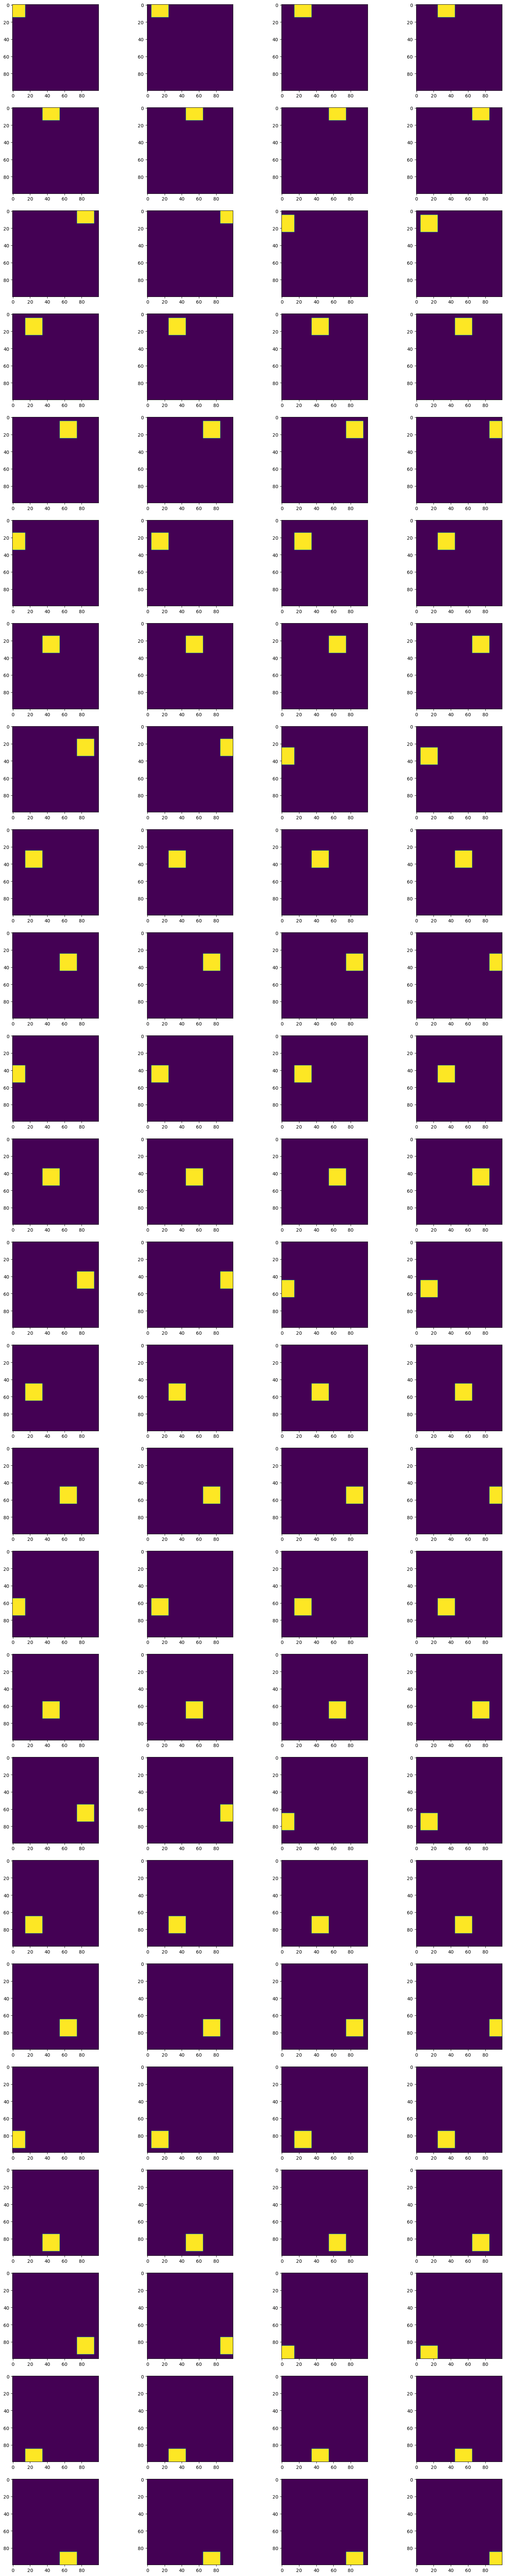

In [69]:
n_rows = int(math.ceil(len(block_coords)/4))

fig, axes = plt.subplots(n_rows, 4, figsize=(20, n_rows*4))
for block, ax in zip(block_coords, axes.flat):
    
    sl = block[1]
    arr = np.zeros(array_size)
    arr[sl] = 1
    ax.imshow(arr)
    ax.set_aspect('equal')
    
plt.show()

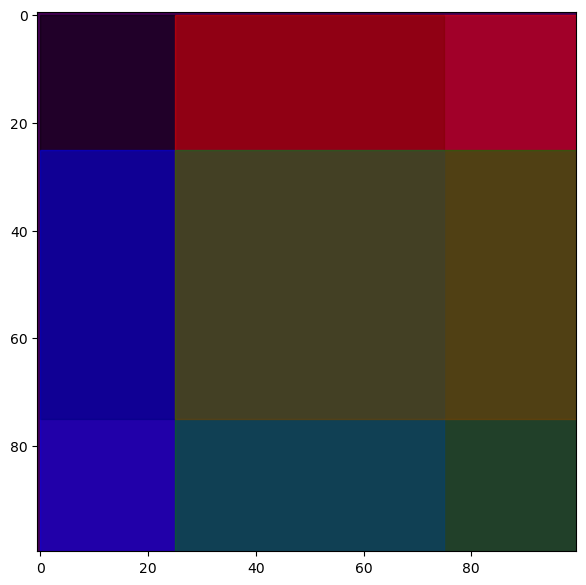

In [52]:
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot()

arr = np.zeros(array_size)
ax.imshow(arr)

colors = ['k', 'b', 'r', 'g', 'y', 'purple', 'pink']
for i, block in enumerate(block_coords):
    coords = block[1]
    left, bottom = coords[0].start, coords[1].start
    width, height = coords[0].stop - coords[0].start, coords[1].stop - coords[1].start
    p = plt.Rectangle((left, bottom), width, height, fill=True, color=colors[i], alpha=.5)
    ax.add_patch(p)
    
plt.show()